In [55]:
%matplotlib inline
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [56]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<AxesSubplot:>

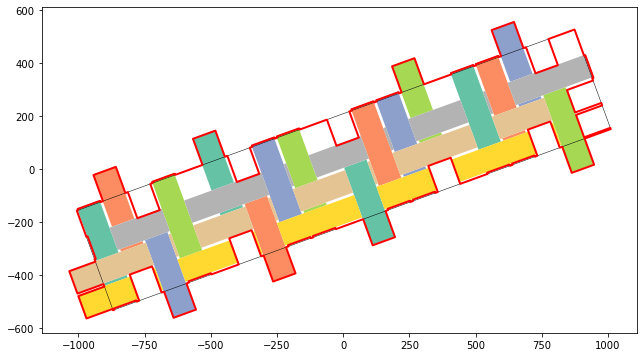

In [57]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = .9,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [58]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")

In [76]:
weave1.tiles["id"] = range(weave1.tiles.shape[0])
weave1.tiles

,element_id,geometry,id
0,a,"POLYGON ((1761709.835 5903022.250, 1761744.037...",0
1,a,"POLYGON ((1761103.181 5903227.117, 1761137.383...",1
2,a,"POLYGON ((1762039.452 5903578.536, 1762042.873...",2
3,a,"POLYGON ((1760629.913 5903065.505, 1760633.334...",3
4,a,"POLYGON ((1760647.946 5902752.815, 1760732.519...",4
...,...,...,...
29371,g,"POLYGON ((1754859.414 5926814.092, 1754868.810...",29371
29372,g,"POLYGON ((1754984.165 5926763.722, 1754953.383...",29372
29373,g,"POLYGON ((1755235.291 5926950.900, 1755244.688...",29373
29374,g,"POLYGON ((1755526.595 5927056.927, 1755557.377...",29374


In [79]:
weave1.tiles.to_file("tiles.gpkg")

In [80]:
import dask_geomodeling as dgm
from dask_geomodeling.geometry import GeometryFileSource

from shapely.geometry import box

dg_ak = GeometryFileSource("data/imd-auckland-2018.gpkg", id_field = "DZ2018")
dg_tiles = GeometryFileSource("tiles.gpkg")

intersect = dgm.geometry.set_operations.Intersection(dg_tiles, dg_ak)

NotImplementedError: Cannot compare geometries with another geometry datasource

In [5]:
textile1 = weave1.get_tiled_map(# prioritise_tiles = True, ragged_edges = True, 
                                debug = True)

Time at start of get_tiled_map(): 929930.995
Time to prep data (rotation if requested): 0.000
Time to overlay tiling with zones: 0.786
Time to calculate areas: 0.002
Time to overlay tiling with zones: 0.001
Time to build lookup for join: 0.341
Time to perform lookup join: 0.010
Time to dissolve tiles within zones: 0.359


In [6]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to 
                  available element_ids.


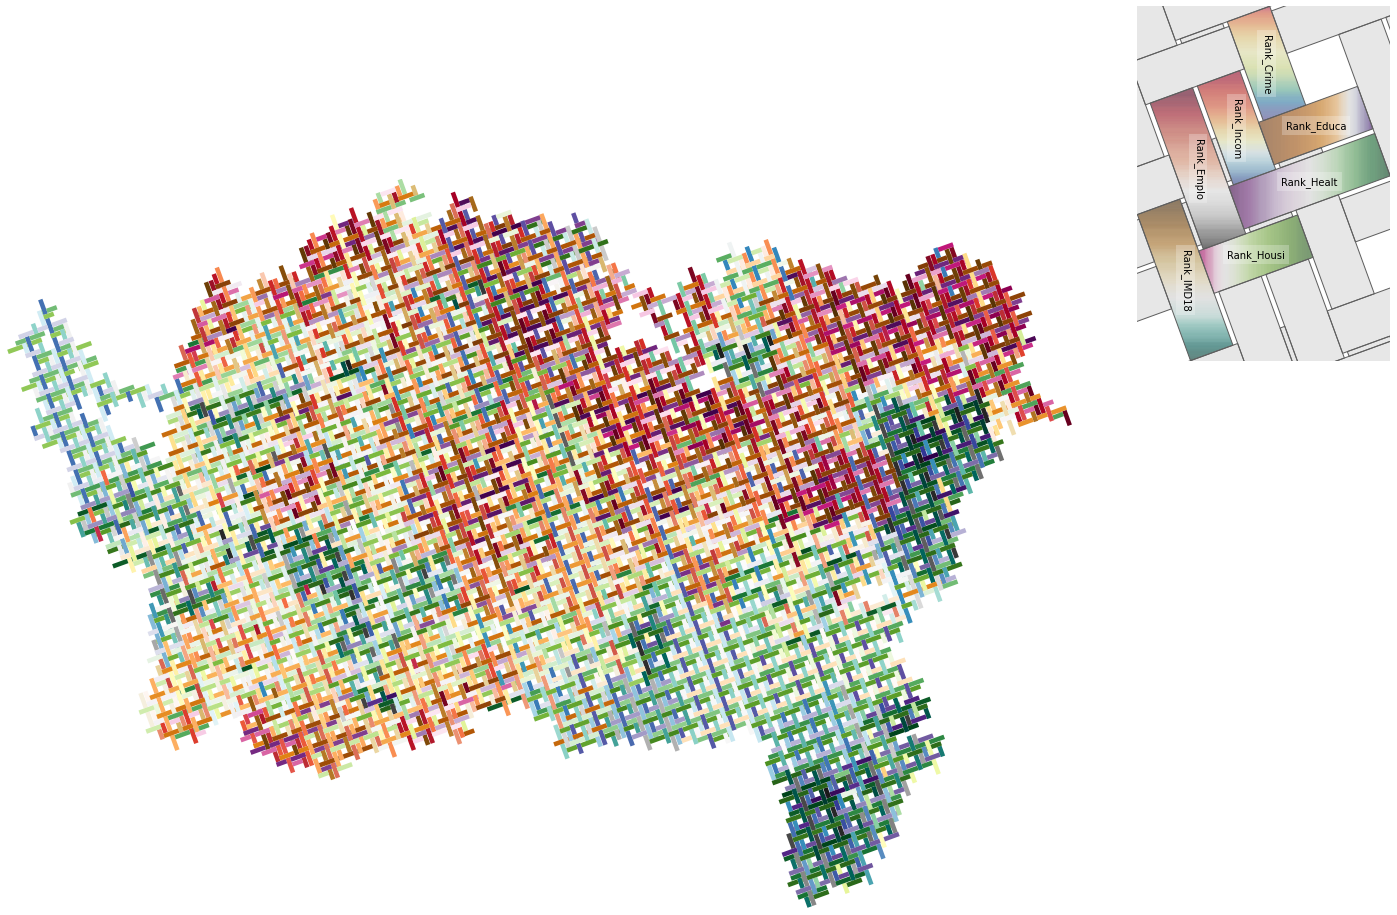

In [7]:
fig = textile1.render(legend = True)

## Triaxial weave

<AxesSubplot:>

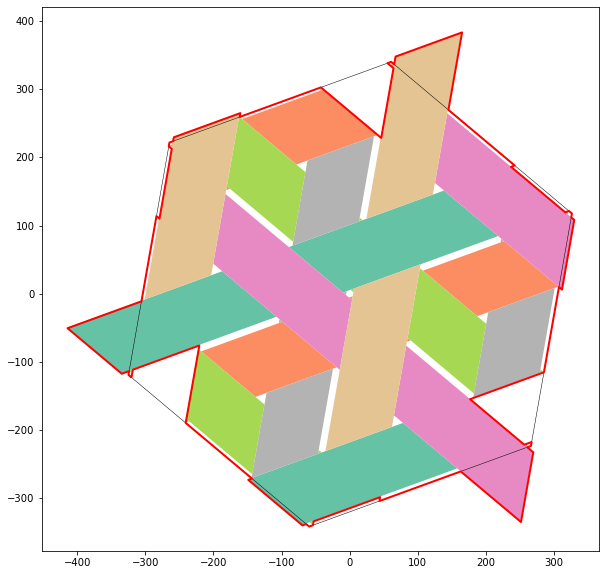

In [8]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .9,
               strands = "a-c|d-f|g-i", crs = ak.crs).transform_rotate(20)
w2.plot(r = 0, cmap = "Set2", figsize = (10, 10), show_ids = False)

In [9]:
weave2 = Tiling(w2, ak, id_var = "DZ2018")

In [10]:
textile2 = weave2.get_tiled_map(# prioritise_tiles = True, ragged_edges = True,
                                debug = True)

Time at start of get_tiled_map(): 929940.020
Time to prep data (rotation if requested): 0.000
Time to overlay tiling with zones: 1.539
Time to calculate areas: 0.004
Time to overlay tiling with zones: 0.002
Time to build lookup for join: 0.720
Time to perform lookup join: 0.019
Time to dissolve tiles within zones: 0.837


In [11]:
textile2.variables = dict(zip(list("acdfgi"),
                              [x for x in ak if "Rank" in x]))
textile2.colourmaps = dict(zip(textile2.variables.values(),
                               ("BrBG", "RdGy", "RdYlBu", "Spectral",
                                "PiYG", "PRGn", "PuOr", "viridis")))

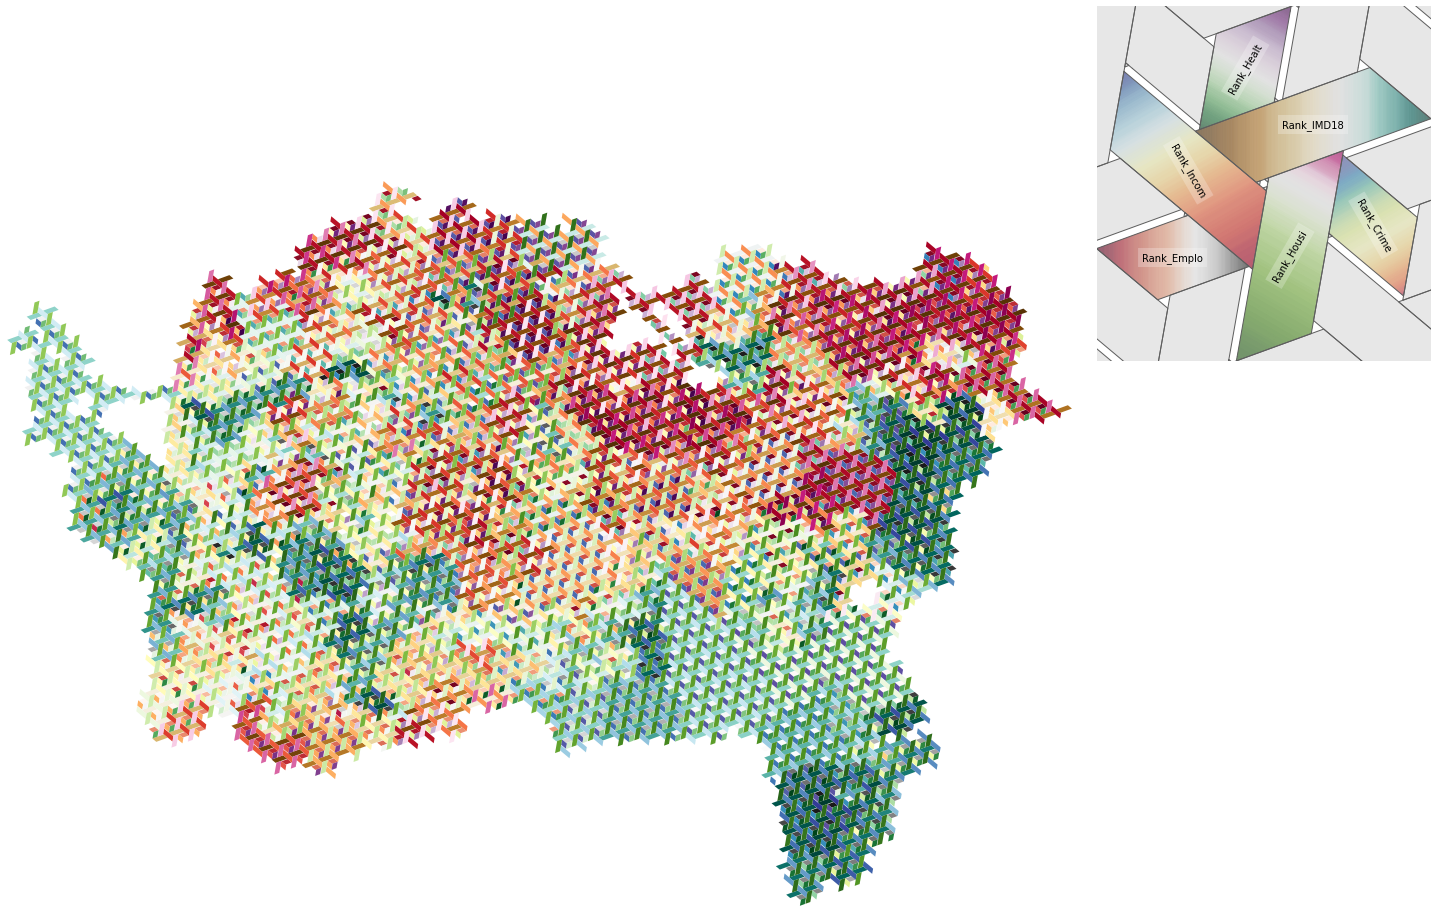

In [12]:
fig = textile2.render(legend = True)